# EXERCÍCIO

Na aula anterior nós utilizamos somente 4 atributos para aplicar a regressão múltipla. O objetivo deste exercício é criar um modelo de regressão linear múltipla utilizando todos os atributos da base de dados. Compare os resultados entre os algoritmos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("CSVs/house_prices.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id','date'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [4]:
X_full = df.iloc[:,1:].values
X_full.shape

(21613, 18)

In [5]:
y = df.iloc[:,0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [6]:
y = np.log(y)
y

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

In [7]:
X_part = df.iloc[:, [2,3,9,10]].values
X_part.shape

(21613, 4)

In [8]:
X_f_train, X_f_test, y_train, y_test = train_test_split(X_full, y, test_size = 0.2, random_state = 1)
X_f_train.shape, X_f_test.shape

((17290, 18), (4323, 18))

In [9]:
reg_full = LinearRegression()
reg_full.fit(X_f_train,y_train)

LinearRegression()

In [10]:
pred_full = reg_full.predict(X_f_test)
pred_full

array([13.19086065, 13.0013156 , 13.47725483, ..., 12.65155042,
       14.21426527, 12.88024659])

In [11]:
y_test

array([13.03680549, 13.00582956, 13.87094526, ..., 12.46843691,
       14.40051558, 12.94323671])

In [12]:
reg_full.score(X_f_test, y_test)

0.7758399045656568

In [13]:
X_p_train, X_p_test, y_train, y_test = train_test_split(X_part, y, test_size = 0.2, random_state = 1)
X_p_train.shape, X_p_test.shape

((17290, 4), (4323, 4))

In [14]:
reg_part = LinearRegression()
reg_part.fit(X_p_train,y_train)

LinearRegression()

In [15]:
reg_part.score(X_p_test, y_test)

0.583736323335128

In [16]:
df.drop(['sqft_living15','sqft_lot15'], axis=1, inplace =True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
dtypes: float64(5), int64(12)
memory usage: 2.8 MB


In [18]:
import seaborn as sns

In [19]:
cols = list(df.columns)
print(cols)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']


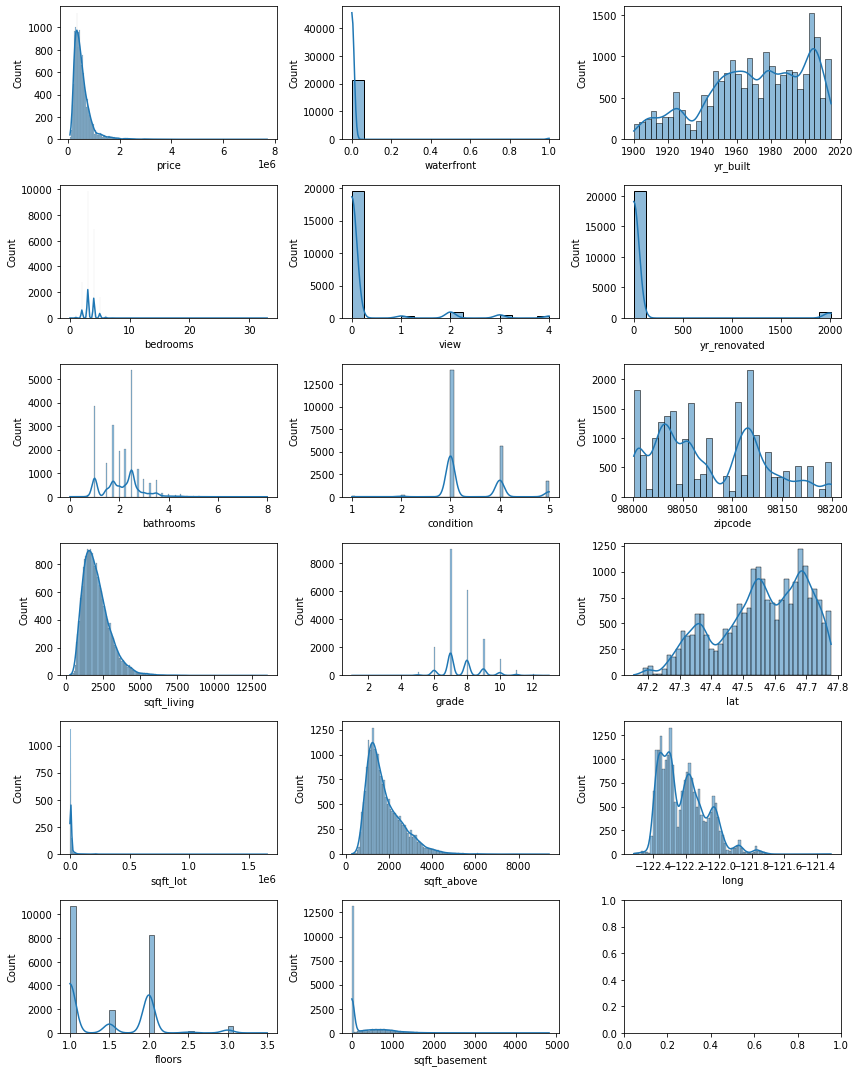

In [20]:
f, ax = plt.subplots(6,3, figsize=(12,15))
c = 0
for i in range(3):
    for j in range(6):
        if c < 17:
            sns.histplot(df[cols[c]], kde=True, ax = ax[j][i])
            c += 1
            
plt.tight_layout()
plt.show()

In [21]:
df_log = df.copy()

In [22]:
df_log['price'] = np.log(df['price'])

In [23]:
df_log['yr_built'] = np.log(df['yr_built'])

In [24]:
df_log['sqft_living'] = np.log(df['sqft_living'])

In [25]:
df_log['sqft_above'] = np.log(df['sqft_above'])

In [26]:
df_log['grade'] = np.log(df['grade'])

In [27]:
X = df_log.iloc[:,1:].values
X.shape

(21613, 16)

In [28]:
y = df_log.iloc[:,0].values
y

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 16), (4323, 16))

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
reg.score(X_test, y_test)

0.763835689508262